/usr/lib/python3/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



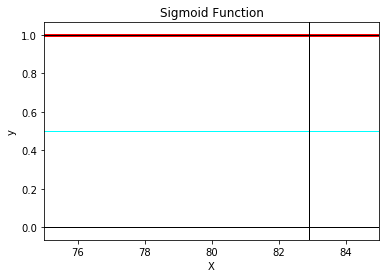

In [2]:
import pandas as pandas
import numpy as np
import plotly.express as plotly_express
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#reading the csv file as df
df = pandas.read_csv('data.csv')

#list form
df_velo_list = df["Velocity"].tolist()
df_escaped_list = df["Escaped"].tolist()

#ploting scatter plot with plotly_express
fig = plotly_express.scatter(df, x="Velocity", y="Escaped", title="Scatter Plot")
fig.show()

#ploting the line of regression with numpy
velo_arr = np.array(df_velo_list)
escaped_arr = np.array(df_escaped_list)

#slope and intercept
m,c = np.polyfit(velo_arr, escaped_arr, 1)
y = []
for x in velo_arr:
    y_val = m*x + c
    y.append(y_val)

#ploting the graph
fig = plotly_express.scatter(x=velo_arr, y=escaped_arr, title="linear regression")
fig.update_layout(shapes=[dict(type='line', x0=min(velo_arr), y0=min(y), x1=max(velo_arr), y1=max(y))])
fig.show()

# sigmoid function
X = np.reshape(df_velo_list, (len(df_velo_list), 1))
Y = np.reshape(df_escaped_list, (len(df_escaped_list), 1))
lr = LogisticRegression()
lr.fit(X, Y)
plt.figure()
plt.scatter(X.ravel(), Y.ravel(), color='blue',zorder = 20)

def sig(x):
    return 1 / (1 + np.exp(-x))

X_test = np.linspace(0,100,200)
chance = sig(X_test*lr.coef_ + lr.intercept_).ravel()
plt.axhline(y=0, color='black', linewidth=1, linestyle='-')
plt.plot(X_test, chance, color='red',linewidth = 3)   #plotting the sigmoid function
plt.axhline(y=0, color='black', linewidth=1, linestyle='-')
plt.axhline(y=1, color='black', linewidth=1, linestyle='-')
plt.axhline(y=0.5, color='cyan', linewidth=1, linestyle='-')

plt.axvline(x=X_test[165], color='black', linewidth=1, linestyle='-')

plt.ylabel('y')
plt.xlabel('X')
plt.title('Sigmoid Function')
plt.xlim(75,85)
plt.show()